In [1]:
import sys
from pathlib import Path
# Add the src directory to the Python path
project_path = Path().resolve().parent  # Adjust if necessary
sys.path.append(str(project_path / 'src'))
import pandas as pd
from nodular_infiltrative_results import NodularAndInfiltrativeResults


In [2]:
df2 = pd.read_csv('../data/preprocessed_dataset4.csv')
df2.head()

,param_b,param_d,param_h2,param_r,param_h3,param_Dm,param_ts,param_S,IW,IW_after_3_months,...,m2_rand1,m2_rand2,m2_rand3,m2_rand4,m2_rand5,T1Gd_MRI,FLAIR_MRI,m2/m1 at the core,m2/m1 at the edge,random m2/m1
0,0.007583,0.011995,0.016905,0.77513,0.001358,0.049575,0.47649,0.39058,7.7,5.0,...,17.051298,11.466250,14.781244,17.051298,17.051298,3.318854,6.011855,3.609976,3.461021,3.271834
1,0.017364,0.214110,0.052564,0.64912,0.092466,0.011697,0.19718,0.38084,57.4,15.5,...,23.700744,23.336736,23.601960,23.676358,23.719638,24.697007,49.172917,8.191630,16.334034,9.219569
2,0.025704,0.228750,0.086792,0.44058,0.041428,0.082967,0.41771,0.18997,57.4,15.0,...,23.318321,22.113603,22.950901,23.249889,23.350797,29.909090,56.070952,15.464051,25.307228,16.091996
3,0.025496,0.207690,0.093530,0.66250,0.066799,0.043951,0.19588,0.26457,58.1,14.0,...,22.929723,23.212832,23.113538,22.974069,22.913368,25.347036,50.057759,7.952829,17.101410,9.198852
4,0.003470,0.023539,0.073731,0.60801,0.033812,0.023481,0.10858,0.13663,12.6,10.5,...,3.293029,1.353164,2.681827,3.293029,3.546935,3.954359,7.686673,3.847851,2.799928,3.193474


In [3]:
output_path = '../tests/analysis_results.csv'  # Specify the output file path
analysis = NodularAndInfiltrativeResults(df2, output_path)


In [4]:
analysis.split_datasets()


In [5]:
features_to_add_noise = ['ki67','m2/m1 at the core','m2/m1 at the edge', 'random m2/m1']  # Specify your features
noise_levels = [1, 5, 10]  # Define your noise levels
analysis.add_noise_to_datasets(features_to_add_noise, noise_levels, verbose=True)


Adding noise with sigma=1 to nodular and infiltrative datasets.
Adding noise with sigma=5 to nodular and infiltrative datasets.
Adding noise with sigma=10 to nodular and infiltrative datasets.


In [6]:
scenarios = {
    'I': ['ki67', 'T1Gd_MRI','FLAIR_MRI'],
    'II':['ki67','T1Gd_MRI','FLAIR_MRI', 'random m2/m1'],
    'III':['ki67','T1Gd_MRI','FLAIR_MRI','m2/m1 at the core'],
    'IV':['ki67','T1Gd_MRI','FLAIR_MRI','m2/m1 at the edge'],
    'V':['ki67','T1Gd_MRI','FLAIR_MRI','m2/m1 at the core','m2/m1 at the edge'],
}

In [7]:
targets = ['IW_after_3_months', 'IW_after_12_months']  # Define your targets
results_df = analysis.run_analysis(scenarios, targets)

Results saved to ../tests/analysis_results.csv


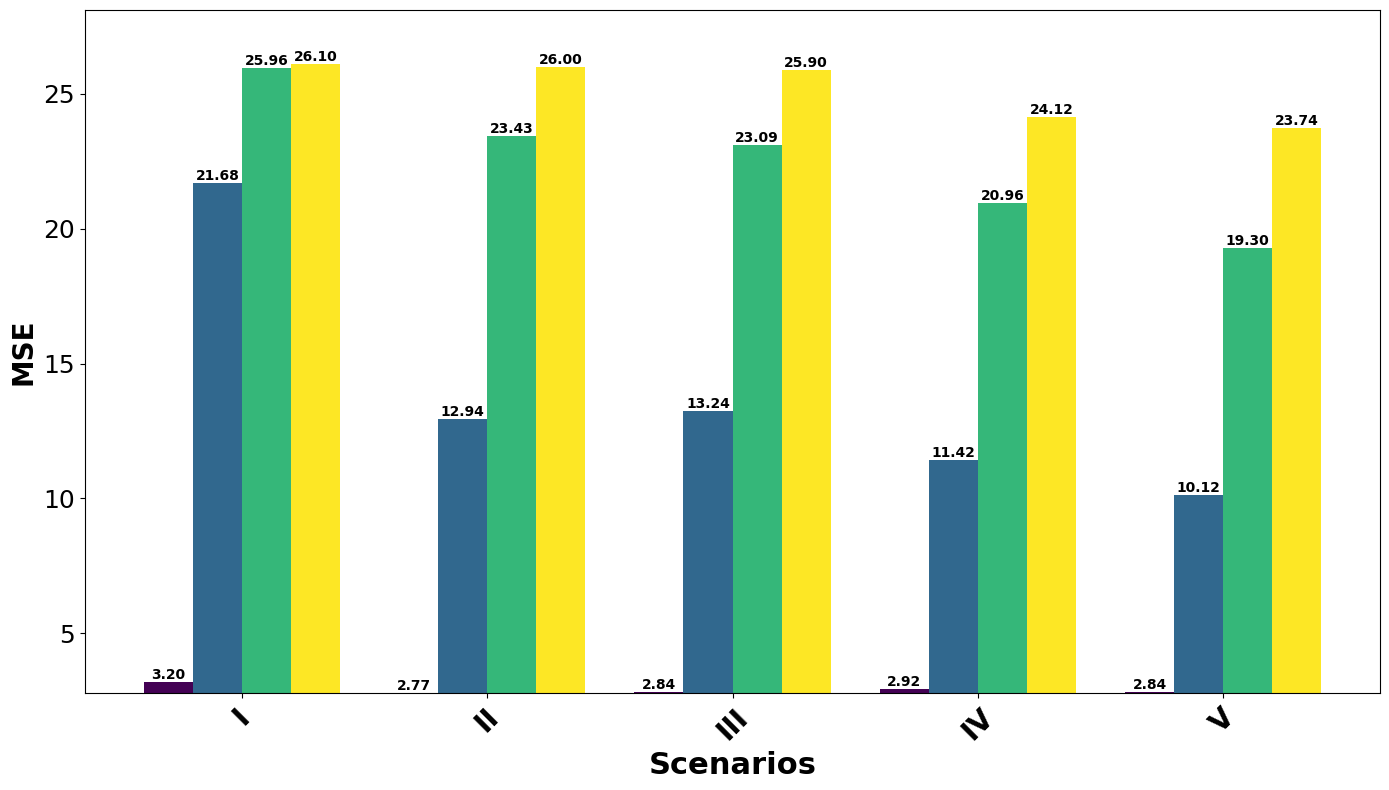

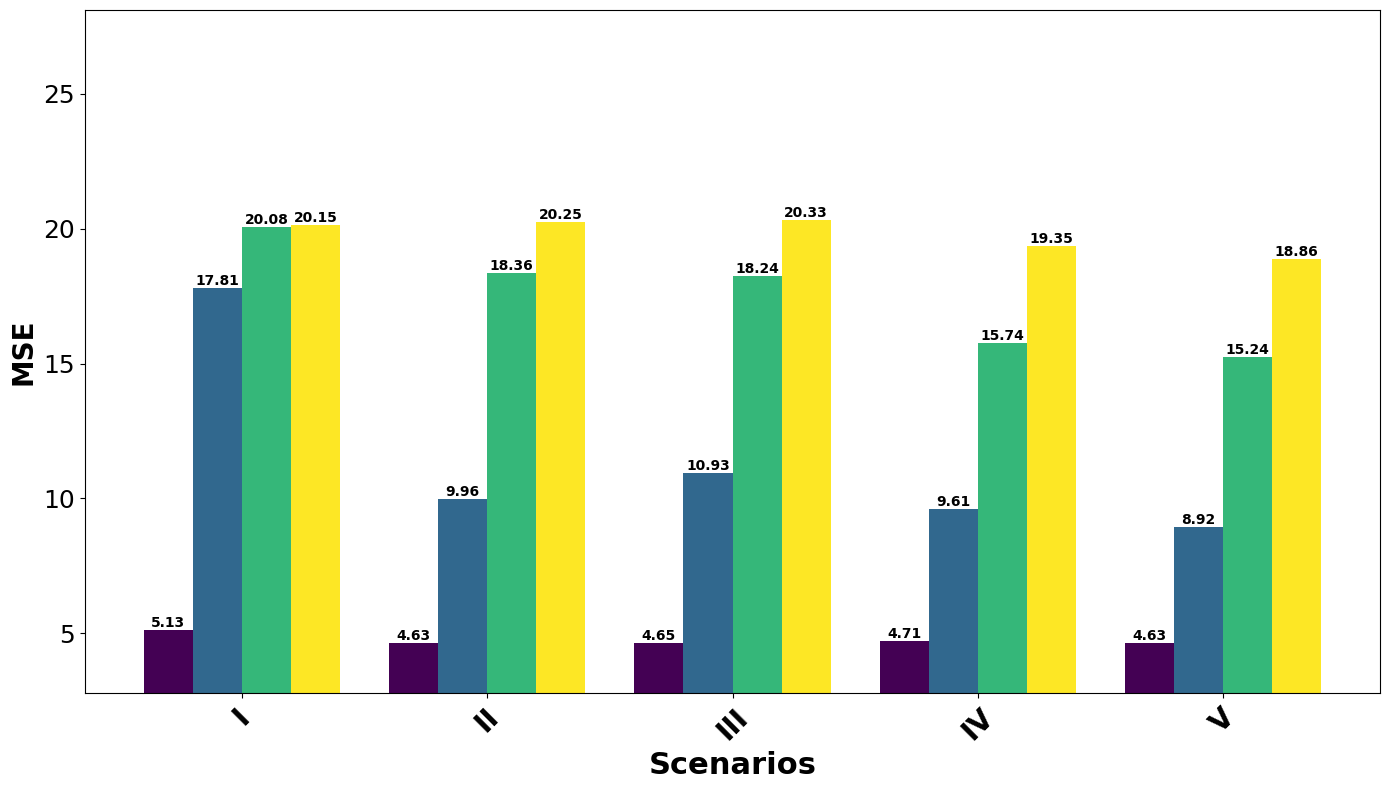

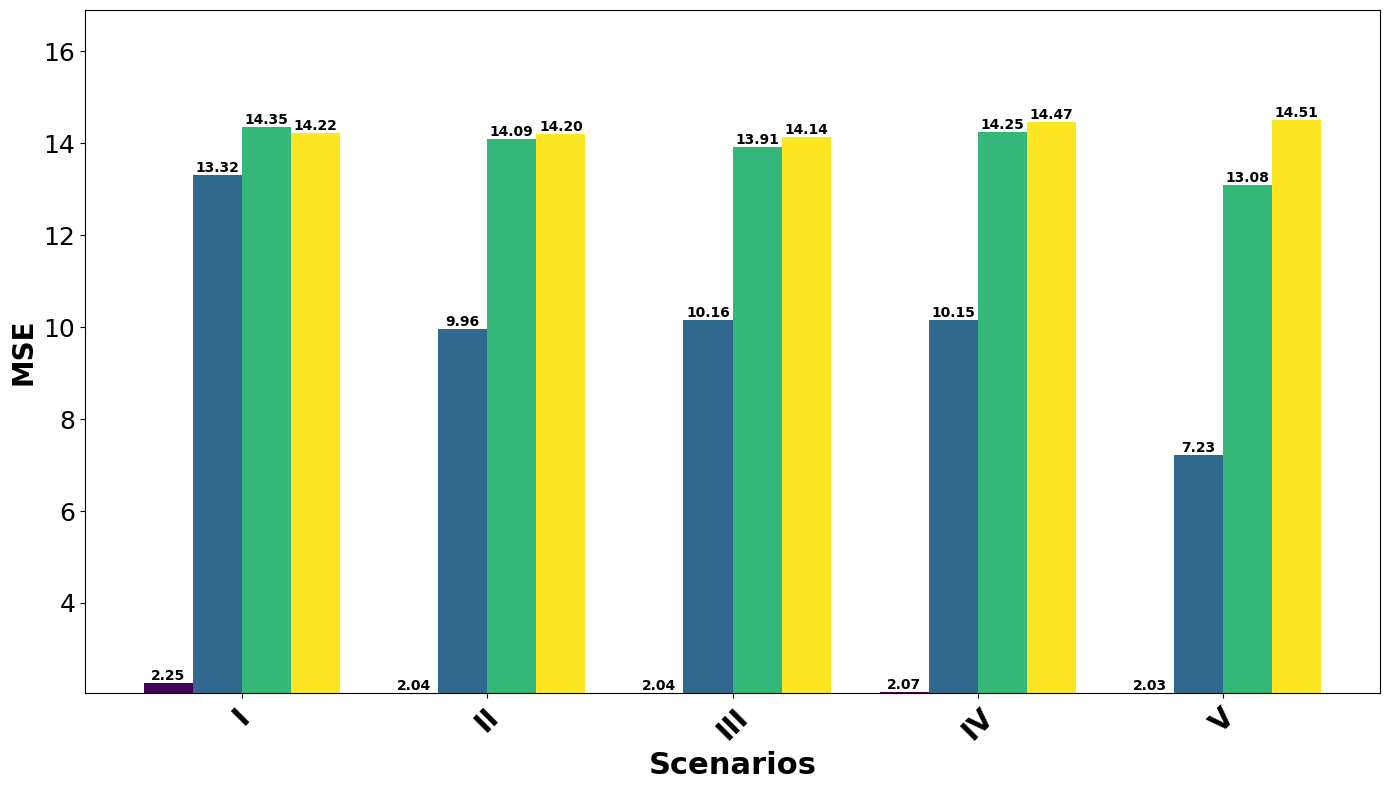

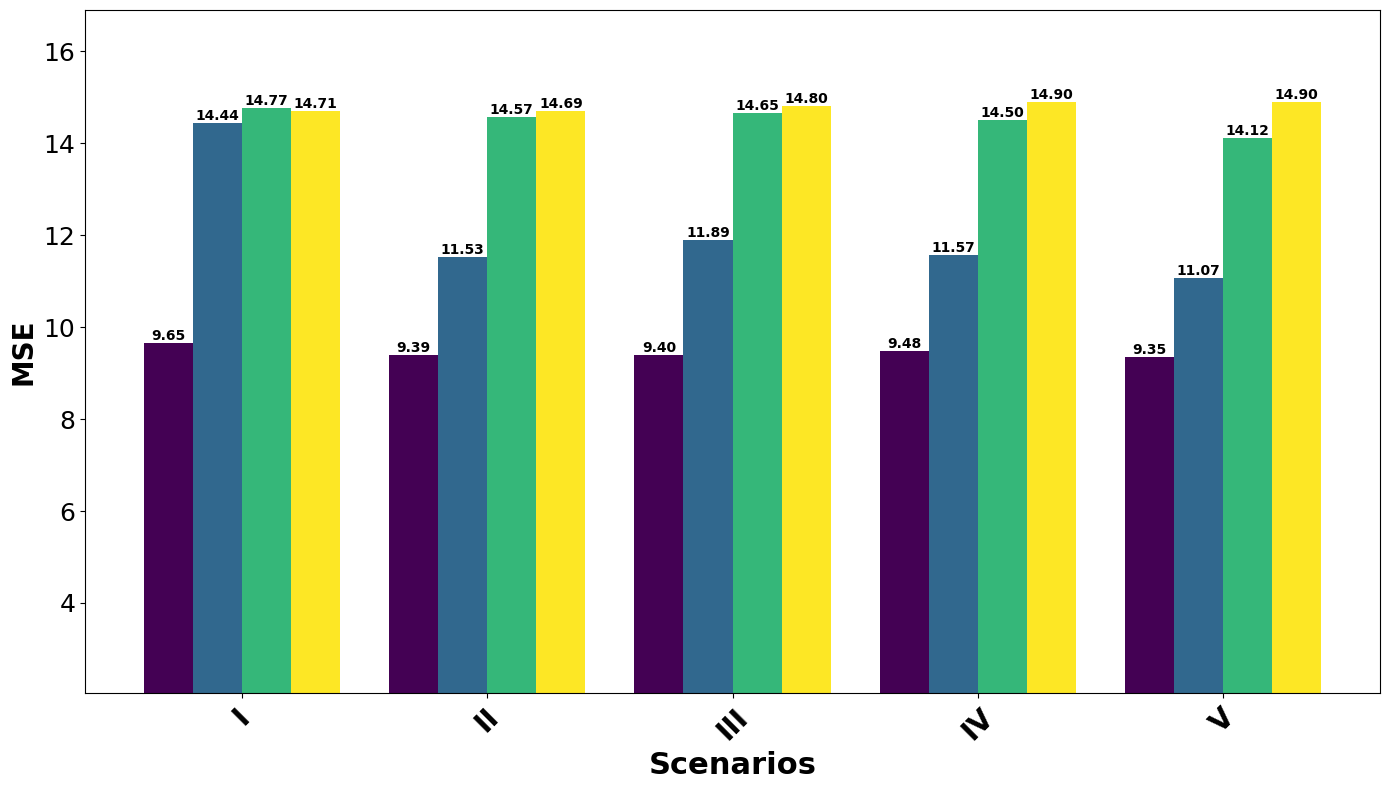

In [8]:
analysis.plot_mse(results_df, scenarios, dataset_type='Nodular', output_prefix='../tests/nodular')
analysis.plot_mse(results_df, scenarios, dataset_type='Infiltrative', output_prefix='../tests/infiltrative')


In [9]:
analysis.calculate_feature_importances(targets)

# Plot feature importances for a specific target and dataset type
analysis.plot_feature_importances(target='IW_after_3_months', dataset_type='Nodular', output_prefix='../tests/feature_importance_nodular')
analysis.plot_feature_importances(target='IW_after_12_months', dataset_type='Infiltrative', output_prefix='../tests/feature_importance_infiltrative')


KeyboardInterrupt: 